# Pymaceuticals Inc.
---

### Analysis

Based on analysis made using a bar graph it clearly shows that the drug regimen Capomulin is the treatment used in the study more than any other drug regimen.

When it comes to sex of mice, it is not a significant variable to the study as the difference between male and female is only 2%. So treatment is very well distributed across male and female mice

When looking at specific regimens using a box plot, drug regimen Capomulin and Ramicane resulted in lower final tumor volume, with Capomulin having the very lowest final tumor volume with Remicane in remarkably close range. To really study which of these two regimens results in the lowest final tumor volume. A study comparing just these regimens, where the number of mice treated is same along with sex of mice.

When looking at a specific Mouse ID l509 treated by Capomulin, it shows that the tumor volume decreases as time has passed. 

Regression analysis shows the average tumor volume as weight of mice change. There is positive correlation between mice weight, and average tumor volume. The correlation between mouse weight and the average tumor volume is 0.84


Overall, the conclusion from the data analyzed is that the Drug Regimen Capomulin reduces the size of tumors
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_merged_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mice = len(mouse_study_merged_df["Mouse ID"].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicated_df = mouse_study_merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_miceID = mouse_study_merged_df.loc[duplicated_df,"Mouse ID"].unique()
duplicated_miceID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_miceID_data = mouse_study_merged_df.loc[mouse_study_merged_df["Mouse ID"] == duplicated_miceID[0]]
duplicated_miceID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_micedata = mouse_study_merged_df.drop(duplicated_miceID_data.index)
updated_micedata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
updated_totalmice = len(updated_micedata["Mouse ID"].unique())
updated_totalmice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = updated_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = updated_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = updated_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std = updated_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = updated_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_statistics = pd.DataFrame({
                                   "Tumor Volume Mean" : mean, 
                                   "Tumor Volume Median" : median, 
                                   "Tumor Volume Variance" : var,
                                   "Tumor Volume Std. Dev." : std,
                                   "Tumor Volume Std. Err." : sem})

summary_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_methodII = updated_micedata.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

summary_statisticsII = summary_statistics_methodII.rename(columns={
                                   "mean": "Tumor Volume Mean",
                                   "median": "Tumor Volume Median", 
                                   "var": "Tumor Volume Variance",
                                   "std": "Tumor Volume Std. Dev.",
                                   "sem": "Tumor Volume Std. Err."})
summary_statisticsII

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

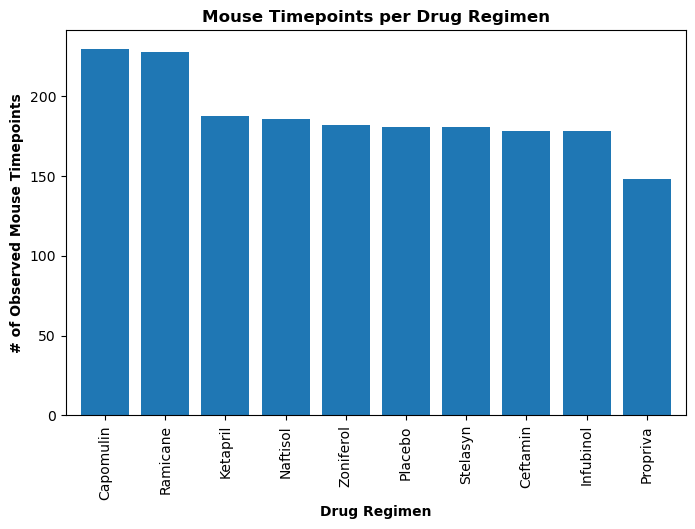

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mouse_per_DrugRegimen = updated_micedata.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False)

Mouse_per_DrugRegimen.plot(kind="bar", figsize=(8,5), width=0.8)

plt.title("Mouse Timepoints per Drug Regimen", fontweight = "bold")
plt.xlabel("Drug Regimen", fontweight = "bold")
plt.ylabel("# of Observed Mouse Timepoints", fontweight = "bold")

plt.show()
plt.tight_layout()

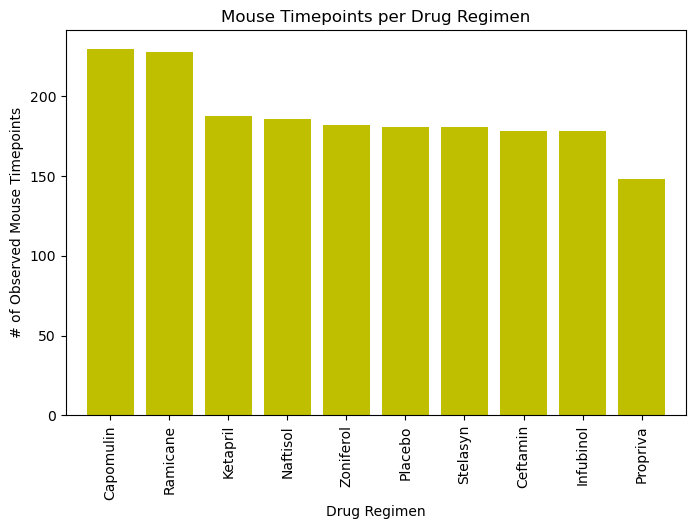

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = Mouse_per_DrugRegimen.index.values
y_axis = Mouse_per_DrugRegimen.values

fig, ax = plt.subplots(figsize=(8, 5))
plt.bar(x_axis, y_axis, color='y', alpha=1.0, align='center')


plt.title("Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.xlim(-0.75, len(x_axis)-0.25)

plt.show()

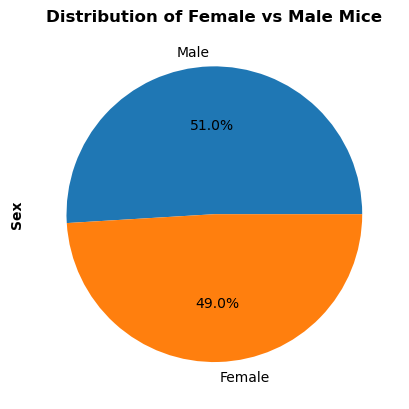

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
By_Gender = updated_micedata.groupby("Sex")["Sex"].count().sort_values(ascending=False)

By_Gender.plot(kind="pie", autopct='%1.1f%%', startangle=360)
plt.title(label="Distribution of Female vs Male Mice", fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')
plt.show()

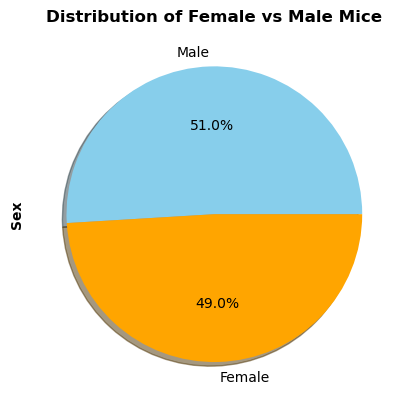

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Sex = By_Gender.index
colors = ["skyblue", "orange"]
explode = (0, 0)
plt.pie(By_Gender, explode=explode, labels=Sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.title(label="Distribution of Female vs Male Mice", fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = updated_micedata.groupby("Mouse ID")["Timepoint"].max()
greatest_timepoint_df =pd.DataFrame(greatest_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(greatest_timepoint_df,updated_micedata, on=["Mouse ID", "Timepoint"])


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
specific_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
volume_tumor_capomulin = []
volume_tumor_ramicane = []
volume_tumor_infubinol = []
volume_tumor_ceftamin = []
            
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for e in range(len(tumor_volume)-1):
    if tumor_volume.loc[e, "Drug Regimen"] == "Capomulin":
        volume_tumor_capomulin.append(tumor_volume.loc[e, "Tumor Volume (mm3)"])
    if tumor_volume.loc[e, "Drug Regimen"] == "Ramicane":
        volume_tumor_ramicane.append(tumor_volume.loc[e, "Tumor Volume (mm3)"])
    if tumor_volume.loc[e, "Drug Regimen"] == "Infubinol":
        volume_tumor_infubinol.append(tumor_volume.loc[e, "Tumor Volume (mm3)"])
    if tumor_volume.loc[e, "Drug Regimen"] == "Ceftamin":
        volume_tumor_ceftamin.append(tumor_volume.loc[e, "Tumor Volume (mm3)"])
    
volume_tumor=[volume_tumor_capomulin, volume_tumor_ramicane, volume_tumor_infubinol, volume_tumor_ceftamin]  

# Calculate upper and lower bounds   
outlier = []
for e in range(len(volume_tumor)):
    quartiles = pd.Series(volume_tumor[e]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{specific_regimens[e]}:")

    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
      
for g in range(len(volume_tumor[e])):
    if (volume_tumor[e][g] < lower_bound) or (volume_tumor[e][g] > upper_bound):
        the_outlier = volume_tumor[e][g]
        outlier.append(the_outlier)
        print(f"The outliers are {outlier}.")
  


Capomulin:
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

Ceftamin:
The lower quartile of tumor volum

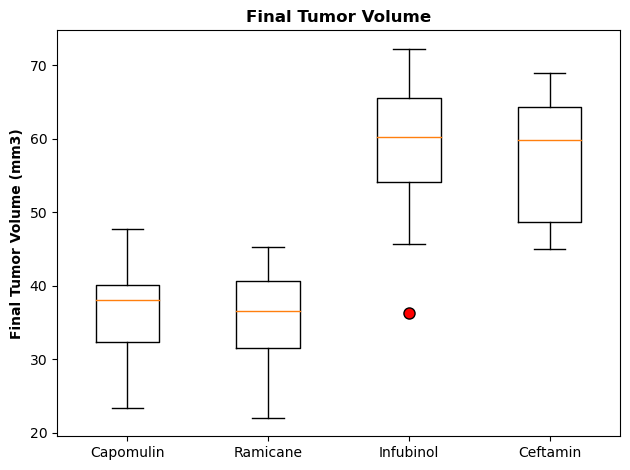

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(volume_tumor, labels=specific_regimens, flierprops={'markerfacecolor':'r','markersize': 8})
plt.title("Final Tumor Volume", fontweight='bold')
plt.ylabel("Final Tumor Volume (mm3)", fontweight='bold')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

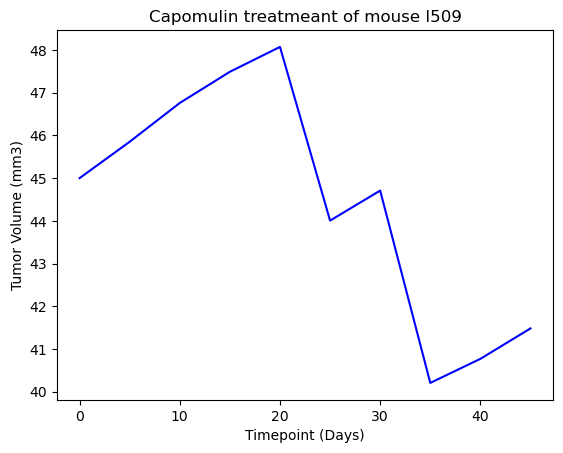

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin = updated_micedata.loc[updated_micedata["Drug Regimen"] == "Capomulin"]

mouse_df = Capomulin.loc[Capomulin["Mouse ID"] == "l509"]
plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], color="blue")
plt.title("Capomulin treatmeant of mouse l509")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

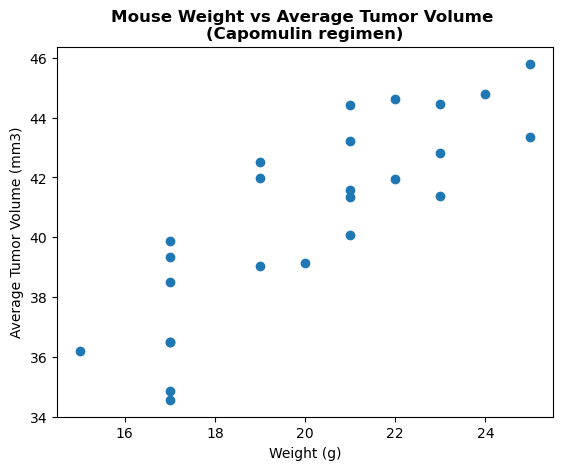

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_df = Capomulin.groupby("Mouse ID")
mouse_weight = Capomulin_df["Weight (g)"].unique()
mouse_tumor_vol = Capomulin_df["Tumor Volume (mm3)"].mean()

plt.scatter(mouse_weight, mouse_tumor_vol)

plt.title("Mouse Weight vs Average Tumor Volume \n(Capomulin regimen)", fontweight='bold')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


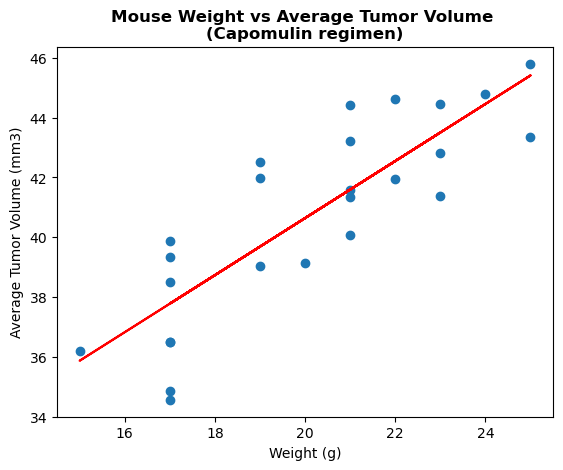

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

Capomulin_df = Capomulin.groupby("Mouse ID")
mouse_weight = Capomulin_df["Weight (g)"].unique().astype(float)
mouse_tumor_vol = Capomulin_df["Tumor Volume (mm3)"].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, mouse_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, mouse_tumor_vol)
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Mouse Weight vs Average Tumor Volume \n(Capomulin regimen)", fontweight='bold')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight,mouse_tumor_vol)[0],2)}")
plt.show()

